# Description

Generates a plot with the top conditions/experiments for LV603.

# Modules loading

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.display import display
from pathlib import Path
import re

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import conf
from data.cache import read_data
from data.recount2 import LVAnalysis

In [3]:
assert (
    conf.MANUSCRIPT["BASE_DIR"] is not None
), "The manuscript directory was not configured"

display(conf.MANUSCRIPT["BASE_DIR"])

'/opt/manuscript'

# Settings

In [4]:
LV_NUMBER_SELECTED = 603
LV_NAME_SELECTED = f"LV{LV_NUMBER_SELECTED}"
display(LV_NAME_SELECTED)

'LV603'

In [5]:
OUTPUT_FIGURES_DIR = Path(conf.MANUSCRIPT["FIGURES_DIR"], "entire_process").resolve()
display(OUTPUT_FIGURES_DIR)
OUTPUT_FIGURES_DIR.mkdir(parents=True, exist_ok=True)

PosixPath('/opt/manuscript/content/images/entire_process')

# Load MultiPLIER summary

In [6]:
multiplier_model_summary = read_data(conf.MULTIPLIER["MODEL_SUMMARY_FILE"])

In [7]:
multiplier_model_summary.shape

(2157, 5)

In [8]:
multiplier_model_summary.head()

,pathway,LV index,AUC,p-value,FDR
1,KEGG_LYSINE_DEGRADATION,1,0.388059,0.866078,0.956005
2,REACTOME_MRNA_SPLICING,1,0.733057,0.000048,0.000582
3,MIPS_NOP56P_ASSOCIATED_PRE_RRNA_COMPLEX,1,0.680555,0.001628,0.011366
4,KEGG_DNA_REPLICATION,1,0.549473,0.312155,0.539951
5,PID_MYC_ACTIVPATHWAY,1,0.639303,0.021702,0.083739


# Load S-MultiXcan projection (`z_score_std`)

In [9]:
INPUT_SUBSET = "z_score_std"

In [10]:
INPUT_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [11]:
input_filepath = Path(
    conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
    INPUT_SUBSET,
    f"{INPUT_SUBSET}-{INPUT_STEM}.pkl",
).resolve()
display(input_filepath)

assert input_filepath.exists(), "Input file does not exist"

input_filepath_stem = input_filepath.stem
display(input_filepath_stem)

PosixPath('/opt/data/results/data_transformations/z_score_std/z_score_std-projection-smultixcan-efo_partial-mashr-zscores.pkl')

'z_score_std-projection-smultixcan-efo_partial-mashr-zscores'

In [12]:
data = read_data(input_filepath)

In [13]:
data.shape

(3752, 987)

In [14]:
data.head()

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,LV978,LV979,LV980,LV981,LV982,LV983,LV984,LV985,LV986,LV987
100001_raw-Food_weight,-0.695006,1.962565,0.057683,0.878731,-0.539977,1.481272,-0.396422,1.090180,0.759223,0.931395,...,1.129784,1.752343,-1.411403,2.823863,0.931116,-1.054519,0.432982,-0.633597,0.554279,-0.642479
100002_raw-Energy,-1.528127,-0.345309,-0.148953,-0.242060,0.373427,0.791092,0.263477,0.987702,0.354391,1.416059,...,0.224604,0.769882,-0.509482,0.091153,2.286789,-1.008256,-0.029764,1.737229,-0.272107,-0.526125
100003_raw-Protein,-0.704572,-1.011299,0.671420,0.143991,0.615212,0.874212,-0.040998,0.915170,0.254369,-0.084237,...,1.003019,1.044314,-2.376108,0.004778,0.053714,-0.892447,-0.183800,1.377991,-0.278794,-0.419733
100004_raw-Fat,-0.989832,-1.875490,0.261555,-1.420719,0.366238,1.167049,0.257387,0.717674,-0.997664,0.969825,...,0.585913,0.638314,0.119139,-0.140204,1.394326,-1.173402,0.555058,1.013982,-0.544506,-0.064061
100005_raw-Carbohydrate,-0.580143,0.243335,0.158966,-0.036558,0.068176,-0.202639,1.101281,0.675227,1.463432,1.010078,...,-0.249108,-0.026814,0.232713,0.323682,1.168642,-0.282935,0.653105,1.909526,0.199997,-1.656894


# LV analysis

In [15]:
lv_obj = lv_exp = LVAnalysis(LV_NAME_SELECTED, data)

In [16]:
lv_gene_sets = multiplier_model_summary[
    multiplier_model_summary["LV index"].isin((str(LV_NUMBER_SELECTED),))
    & (
        (multiplier_model_summary["FDR"] < 0.05)
        | (multiplier_model_summary["AUC"] >= 0.75)
    )
]
display(lv_gene_sets)

,pathway,LV index,AUC,p-value,FDR
1511,IRIS_Neutrophil-Resting,603,0.905751,8.355936e-38,4.505939e-35
1512,SVM Neutrophils,603,0.979789,2.856571e-11,1.432936e-09
1513,PID_IL8CXCR2_PATHWAY,603,0.810732,8.814671e-04,7.041943e-03
1516,SIG_PIP3_SIGNALING_IN_B_LYMPHOCYTES,603,0.769292,3.387907e-03,1.948724e-02


## Traits

In [17]:
lv_obj.lv_traits.shape

(3752,)

In [18]:
lv_obj.lv_traits.head(20)

30220_raw-Basophill_percentage                                   6.808564
30130_raw-Monocyte_count                                         5.929725
30000_raw-White_blood_cell_leukocyte_count                       5.475911
myeloid white cell count                                         5.023638
leukocyte count                                                  4.929467
sum of neutrophil and eosinophil counts                          4.813967
granulocyte count                                                4.810645
sum of basophil and neutrophil counts                            4.745751
neutrophil count                                                 4.718833
30160-Basophill_count                                            4.609551
30180_raw-Lymphocyte_percentage                                  4.492022
30140_raw-Neutrophill_count                                      4.238486
monocyte count                                                   4.238454
20003_1140875420-Treatmentmedication_c

## Genes

In [19]:
lv_obj.lv_genes.shape

(6750, 3)

In [20]:
lv_obj.lv_genes.head(10)

,gene_name,LV603,gene_band
0,CXCR2,5.320459,2q35
1,FCGR3B,5.128372,1q23.3
2,TNFRSF10C,5.035457,8p21.3
3,VNN2,4.680865,6q23.2
4,ZDHHC18,4.495976,1p36.11
5,MNDA,4.488505,1q23.1
6,CXCR1,4.442062,2q35
7,P2RY13,4.404405,3q25.1
8,VNN3,4.253184,6q23.2
9,FPR2,4.187560,19q13.41


## Conditions

In [21]:
lv_obj.lv_conds.shape

(37032, 4)

In [22]:
lv_obj.lv_conds.head()

,experiment_id,LV603,project,experiment
0,SRP051688.SRR1740077,2.279927,SRP051688,SRR1740077
1,SRP051688.SRR1740076,2.256947,SRP051688,SRR1740076
2,SRP051688.SRR1740046,2.215945,SRP051688,SRR1740046
3,SRP051688.SRR1740049,2.203057,SRP051688,SRR1740049
4,SRP059959.SRR2082517,2.169530,SRP059959,SRR2082517


# Cell type and tissue attributes

In [23]:
lv_attrs = lv_obj.get_attributes_variation_score()

_tmp = pd.Series(lv_attrs.index)

lv_attrs = lv_attrs[
    _tmp.str.match(
        "(?:cell[\W]*type$)|(?:tissue$)|(?:tissue[\W]*type$)",
        case=False,
        flags=re.IGNORECASE,
    ).values
].sort_values(ascending=False)

display(lv_attrs)

SRP051688, SRP059959, SRP045500, SRP044593, SRP048971, SRP015360, SRP056159, SRP059695, SRP026331, SRP051848, SRP062966, SRP017138, SRP022133, SRP059039, SRP059172, SRP058237, SRP043080, SRP056443, SRP034732, SRP055874, SRP041620, SRP056784, 

/opt/code/libs/data/recount2.py:323: UserWarning: Not all experiments data could be loaded (21 != 22)
  warnings.warn(


cell type    0.587916
celltype     0.445557
tissue       0.146257
dtype: float64

## LV data

In [24]:
lv_data = lv_obj.get_experiments_data()

In [25]:
lv_data.shape

(1141, 50)

In [26]:
lv_data.head()

time                 cell type    assay        donor  \
project   run                                                               
SRP051688 SRR1740034  0 d     primary human B cells  RNA-seq  Donor: HD30   
          SRR1740035  1 d     primary human B cells  RNA-seq  Donor: HD30   
          SRR1740036  3 d     primary human B cells  RNA-seq  Donor: HD30   
          SRR1740037  7 d     primary human B cells  RNA-seq  Donor: HD30   
          SRR1740038  0 d  primary human myeloid DC  RNA-seq  Donor: HD30   

                     tissue passages  age cellcount celltype collectiondate  \
project   run                                                                 
SRP051688 SRR1740034    NaN      NaN  NaN       NaN      NaN            NaN   
          SRR1740035    NaN      NaN  NaN       NaN      NaN            NaN   
          SRR1740036    NaN      NaN  NaN       NaN      NaN            NaN   
          SRR1740037    NaN      NaN  NaN       NaN      NaN            NaN   
          SRR1740038    NaN      NaN  NaN       NaN      NaN            NaN   

                      ... country location individual disease state diagnosis  \
project   run         ...                                                       
SRP051688 SRR1740034  ...     NaN      NaN        NaN           NaN       NaN   
          SRR1740035  ...     NaN      NaN        NaN           NaN       NaN   
          SRR1740036  ...     NaN      NaN        NaN           NaN       NaN   
          SRR1740037  ...     NaN      NaN        NaN           NaN       NaN   
          SRR1740038  ...     NaN      NaN        NaN           NaN       NaN   

                     disease/health status timepoint treatment status  \
project   run                                                           
SRP051688 SRR1740034                   NaN       NaN              NaN   
          SRR1740035                   NaN       NaN              NaN   
          SRR1740036                   NaN       NaN              NaN   
          SRR1740037                   NaN       NaN              NaN   
          SRR1740038                   NaN       NaN              NaN   

                     ethnicity     LV603  
project   run                             
SRP051688 SRR1740034       NaN -0.026016  
          SRR1740035       NaN -0.029451  
          SRR1740036       NaN -0.027997  
          SRR1740037       NaN -0.025136  
          SRR1740038       NaN  0.124358  

[5 rows x 50 columns]

## Prepare experiments data

In [27]:
lv_data = lv_data[lv_attrs.index.tolist() + [LV_NAME_SELECTED]]

In [28]:
# merge "cell type" with "celltype"
lv_data = lv_data.fillna(
    {
        "cell type": lv_data["celltype"],
    }
)

In [29]:
imp_f = "cell type"
assert imp_f in lv_attrs.index

In [30]:
features = [imp_f, LV_NAME_SELECTED]

In [31]:
lv_data.shape

(1141, 4)

In [32]:
lv_data = lv_data[features].dropna()

In [33]:
imp_f_old = imp_f
imp_f = "Cell type"
imp_f_short = "cell_type"
lv_data = lv_data.rename(columns={imp_f_old: imp_f})

In [34]:
lv_data.shape

(339, 2)

In [35]:
lv_data.head()

Cell type     LV603
project   run                                           
SRP051688 SRR1740034     primary human B cells -0.026016
          SRR1740035     primary human B cells -0.029451
          SRR1740036     primary human B cells -0.027997
          SRR1740037     primary human B cells -0.025136
          SRR1740038  primary human myeloid DC  0.124358

In [36]:
lv_data.index.get_level_values("project").unique()

Index(['SRP051688', 'SRP059959', 'SRP045500', 'SRP044593', 'SRP048971',
       'SRP056159', 'SRP059695', 'SRP058237', 'SRP043080', 'SRP056443'],
      dtype='object', name='project')

# Figure: conditions/experiments summary

## Settings

In [37]:
top_x_values = 7

## Use uniform cell types

In [38]:
# lv_data[lv_data[imp_f].str.lower().str.contains("mye")]  # ["Cell type"].iloc[0]

In [39]:
plot_data = lv_data.replace(
    {
        imp_f: {
            # neutrophils
            "primary human neutrophils": "Neutrophils",
            "Neutrophil isolated from peripheral blood": "Neutrophils",
            "Neutrophil": "Neutrophils",
            "neutrophils (Neu)": "Neutrophils",
            # granulocytes
            "granulocyte": "Granulocytes",
            # monocytes
            "primary human monocytes": "Monocytes",
            # whole blood
            "Whole Blood": "Whole blood",
            # PBMC
            "primary human PBMC": "PBMC",
            # B-cells
            "primary human B cells": "B cells",
            # T-cells
            "primary human T cells": "T cells",
            #             "naive CD4+ T-cells": "Naive CD4+ T-cells",
            # epithelial cells
            "epithelial cells (Epi)": "Epithelial cells",
            "primary human myeloid DC": "mDCs",
        }
    }
)

## Plot

PosixPath('/opt/manuscript/content/images/entire_process/lv603_cell_type.pdf')

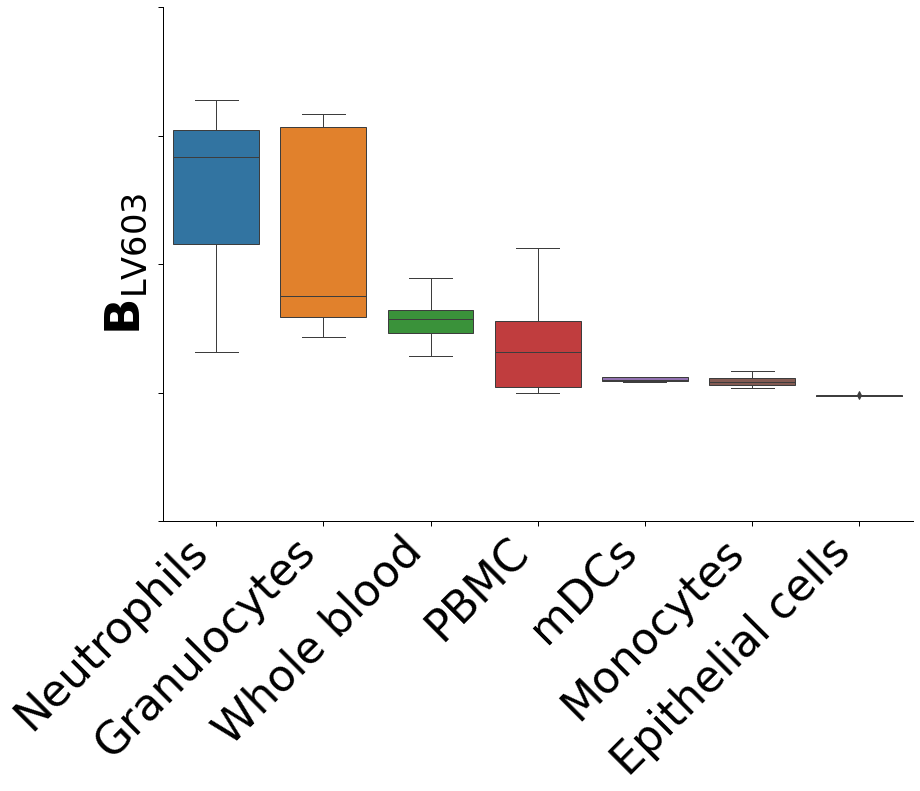

In [40]:
with sns.plotting_context("paper", font_scale=5.0):
    cat_order = plot_data.groupby(imp_f).median().squeeze()

    cat_order = cat_order.sort_values(ascending=False)
    if top_x_values is not None:
        cat_order = cat_order.head(top_x_values)

    cat_order = cat_order.index

    g = sns.catplot(
        data=plot_data,
        x=imp_f,
        y=LV_NAME_SELECTED,
        order=cat_order,
        kind="box",
        linewidth=1,
        height=10,
        aspect=1.5,
    )
    g.ax.set_ylabel(f"$\mathbf{{B}}_{{\mathrm{{LV}}{LV_NUMBER_SELECTED}}}$")
    g.set_xticklabels(g.ax.get_xticklabels(), rotation=45, horizontalalignment="right")
    g.set_yticklabels([])
    g.ax.set_xlabel("")

    output_filepath = OUTPUT_FIGURES_DIR / f"lv{LV_NUMBER_SELECTED}_{imp_f_short}.pdf"
    display(output_filepath)
    plt.savefig(
        output_filepath,
        bbox_inches="tight",
    )

## Data stats

In [41]:
imp_f

'Cell type'

In [42]:
# Get top cell types sorted by median value, then get those cell type names
tmp = plot_data.groupby(imp_f).median().sort_values(by=LV_NAME_SELECTED, ascending=False)
display(tmp)

cell_types = tmp.index
display(cell_types)

,LV603
Cell type,
Neutrophils,1.829943
Granulocytes,0.755082
Whole blood,0.573449
PBMC,0.318773
mDCs,0.100629
Monocytes,0.081489
Epithelial cells,-0.023771
naive CD4+ T-cells,-0.024918
B cells,-0.028149


Index(['Neutrophils', 'Granulocytes', 'Whole blood', 'PBMC', 'mDCs',
       'Monocytes', 'Epithelial cells', 'naive CD4+ T-cells', 'B cells',
       'B-cells', 'naive CD8+ T-cells', 'NK', 'CD8', 'T cells',
       'primary human NK cells', 'CD4',
       'immature monocytic myeloid cells (IMMCs)', 'Memory T-cells',
       'NK cells'],
      dtype='object', name='Cell type')

In [43]:
# Get the sample size by cell type; this is in response to editorial comments about Figure 1c
plot_data.groupby(imp_f).count().loc[cell_types]

,LV603
Cell type,
Neutrophils,53
Granulocytes,59
Whole blood,20
PBMC,56
mDCs,8
Monocytes,29
Epithelial cells,5
naive CD4+ T-cells,1
B cells,8
